<h1 align=center><font size = 5>Natal Bars's</font></h1>

## Introduction

This work uses exploratory analysis techniques with a language python and several libraries, associated with the Foursquere API to analyze the location of bars in the city of Natal-RN located in Brazil. Also, you will learn how to use the visualization library, Folium, to visualize the results

## Business Problem
We all know that here in Brazil we like parties and bars, in the capital of the state of Rio Grande do Norte called Natal is no different. However, as in all of Brazil, Natal has no growth plan and there are several parts of the city that can be good or bad to open a business, since this neighborhood or region may be saturated with a certain type of business. Returning to the subject of bar, we can see what is the best region or neighborhood to open a new establishment of this type, and in this context we can reach our question for the Data Science journey, “Where can I open a new bar in Natal-RN ? ” The idea here is to look for the neighborhood where there are fewer bars installed, using the aforementioned techniques.


## Data

The data for this project are based on the addresses of the city that are already mentioned, in the case of Natal / RN. The addresses in Brazil, generally, consist of State, City, Neighborhood and finally street address that can be street or avenue, each street address of these may have one or more zip codes. But how do you create those addresses in the city that will mine the data? There is a website that calls a guide but that website contains most of these addresses, because those addresses are on that website in HTML tables. To be able to use this database, we will use scraping techniques on the web in python and save all the content in csv, to have a base with all the hometown parks. Below is the code that is used to consolidate this base.

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd



#import geocoder # import geocoder
A=[]
B=[]
C=[]
D=[]
E=[]

i=1

while i < 305:
    url = "https://cep.guiamais.com.br/busca/natal-rn?page=" + str(i)
    page = urllib.request.urlopen(url)

    soup = BeautifulSoup(page, "lxml")
    all_tables=soup.find_all("table")
    right_table=soup.find('tbody')

    for row in right_table.findAll('tr'):    
        cells=row.findAll('td')    
        B.append(cells[1].find(text=True))
        aux = str(cells[2].find(text=True))
        aux2 = aux.split(",")
        C.append(aux2[0])
        D.append(aux2[1])
        E.append(cells[4].find(text=True))

    for row2 in right_table.findAll('tr'):    
        cells2=row2.findAll('a')    
        #print(len(cells2))
        A.append((cells2[0].find(text=True)))
        
    i = i+1
    
df=pd.DataFrame(A,columns=['LOGRADOURO'])
df['BAIRRO']=B
df['CIDADE']=C
df['ESTADO']=D
df['CEP']=E

df.to_csv(r'/root/endereco_natal.csv', index = False, header=True)
    

The code above was used to download all content from the site regarding Natal and save it in a csv that we will use in the following steps of our Final project. With the name of the neighborhoods and zip codes in hand we have a perfect base to start mining using the foursquare api to get the locations of the bars and the geopi library trims with the names of the neighborhoods to get latitude and longitude and then move on to foursqaure. With that we have enough tools to answer the question in question of our data project, “Where can I open a new bar in Natal-RN?”.

## Methodology 

Nessa seção vamos discutir o que fizemos com os dados que adquirimos no obtidos da forma citada na seção anterior.

To begin, we will load the data and extract all the neighborhoods in the city of birth so we will have a sense of how many neighborhoods we are dealing with, of course, first of all we will load the relevant libraries.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/root/endereco_natal.csv")

df.head()


,LOGRADOURO,BAIRRO,CIDADE,ESTADO,CEP
0,Rua 15 de Maio,Pajuçara,Natal,RN,59123-029
1,Travessa 1º de Janeiro,Rocas,Natal,RN,59010-322
2,Rua 25 de Outubro,Pajuçara,Natal,RN,59123-027
3,Vila ABC,Nordeste,Natal,RN,59042-570
4,Vila ABC,Quintas,Natal,RN,59035-218


In [3]:
df_barrios = pd.DataFrame(df['BAIRRO'].unique() , columns=['BARRIOS'])
df_barrios

,BARRIOS
0,Pajuçara
1,Rocas
2,Nordeste
3,Quintas
4,Nova Descoberta
5,Neópolis
6,Capim Macio
7,Potengi
8,Nossa Senhora da Apresentação
9,Redinha


Now that we have the list of all the neighborhoods, we have to get their geolocation. This geolocation will be passed to the foursquere API, so we will have the information we will need from that neighborhood. For this task we will need the geopy library.

In [20]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="natal_explorer")

def get_lat_log(loc):
    address = loc
    location = geolocator.geocode(address)
    return location


In [21]:
l = []
lo = []
bar = []

for index, row in df_barrios.iterrows():
    lc = get_lat_log("Brasil, Rio Grande do Norte, Natal, "  + row['BARRIOS']   )
    if lc is not None:
        l.append(lc.latitude)
        lo.append(lc.longitude)
        bar.append( row["BARRIOS"])

In [22]:
df2=pd.DataFrame(bar,columns=['BAIRRO'])
df2['LATITUDE']=l
df2['LONGITUDE']=lo
df2

,BAIRRO,LATITUDE,LONGITUDE
0,Pajuçara,-5.737235,-35.236043
1,Rocas,-5.773724,-35.199791
2,Nordeste,-5.793003,-35.244401
3,Quintas,-5.797218,-35.231670
4,Nova Descoberta,-5.826920,-35.198547
5,Neópolis,-5.866608,-35.208806
6,Capim Macio,-5.857640,-35.201449
7,Potengi,-5.750582,-35.253447
8,Nossa Senhora da Apresentação,-5.746524,-35.278780
9,Redinha,-5.750459,-35.202890


Now we have a dataset with all the locations of the neighborhoods


Next step is to use the foursquare api, we will search all possible information about the neighborhoods we have and thus we will filter what is relevant for our exploratory analysis, which are the bars that are in our neighborhoods.

In [23]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

CLIENT_ID = 'R04BGUJEVL02E52FMRX0NGFU2NFIYKETP3WXMVTCHMS3G4SY' # your Foursquare ID
CLIENT_SECRET = 'VC51ASWZ20WRPXMAITTB2SSSU0U5YJQS1I2QHZHT1LHPV1QC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius
venues_list=[]

for index, row in df2.iterrows():
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        row["LATITUDE"], 
        row["LONGITUDE"], 
        radius, 
        LIMIT)

    results = requests.get(url).json()["response"]['groups'][0]['items']  
    venues_list.append([(
        row["BAIRRO"], 
        row["LATITUDE"], 
        row["LONGITUDE"], 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Neighborhood', 
              'Neighborhood_Latitude', 
              'Neighborhood_Longitude', 
              'Venue', 
              'Venue_Latitude', 
              'Venue_Longitude', 
              'Venue_Category']

    

nearby_venues.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Pajuçara,-5.737235,-35.236043,Praça de Alimentação,-5.758435,-35.246487,Food Court
1,Pajuçara,-5.737235,-35.236043,Seis E Ponto,-5.747582,-35.247780,Dive Bar
2,Pajuçara,-5.737235,-35.236043,Cinépolis,-5.757741,-35.246837,Multiplex
3,Pajuçara,-5.737235,-35.236043,HM Fitness,-5.748366,-35.245207,Gym / Fitness Center
4,Pajuçara,-5.737235,-35.236043,Chiquinho Sorvetes,-5.750725,-35.242752,Ice Cream Shop


Now we can filter only the neighborhoods in the city with their proper location.

In [24]:
nearby_venues_bar = nearby_venues.query('Venue_Category.str.contains("Bar") and not Venue_Category.str.contains("Salon / Barbershop")', engine='python').drop_duplicates()
nearby_venues_bar

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
1,Pajuçara,-5.737235,-35.236043,Seis E Ponto,-5.747582,-35.247780,Dive Bar
9,Pajuçara,-5.737235,-35.236043,Barcana's Petiscaria,-5.744520,-35.247437,Bar
17,Pajuçara,-5.737235,-35.236043,Barreto's Bar,-5.752689,-35.253757,Bar
36,Pajuçara,-5.737235,-35.236043,BAR DA JOSY,-5.726890,-35.268477,Bar
38,Pajuçara,-5.737235,-35.236043,Bar do Feijao,-5.765055,-35.262661,Bar
...,...,...,...,...,...,...,...
3617,Parque das Dunas,-5.734009,-35.236444,Barreto's Bar,-5.752689,-35.253757,Bar
3632,Parque das Dunas,-5.734009,-35.236444,BAR DA JOSY,-5.726890,-35.268477,Bar
3639,Parque das Dunas,-5.734009,-35.236444,Bar do Feijao,-5.765055,-35.262661,Bar
3643,Parque das Dunas,-5.734009,-35.236444,Delícias do Mate,-5.786409,-35.205993,Juice Bar


An important observation to make is that we do not want only the category “Bar” but any type of bar that the foursquare API brought me, however if we filter only by the word “Bar” we will still have the category “Salon / Barbershop” that we do not want , so we have to exclude it from the dataset.

In [25]:
nearby_venues_bar['Neighborhood'].value_counts()

Igapó                            10
Felipe Camarão                   10
Planalto                         10
Bom Pastor                       10
Guarapes                         10
Dix-Sept Rosado                   9
Nossa Senhora da Apresentação     9
Nossa Senhora de Nazaré           9
Cidade da Esperança               9
Cidade Nova                       8
Nordeste                          8
Lagoa Azul                        8
Candelária                        7
Potengi                           7
Quintas                           7
Parque das Dunas                  7
Lagoa Nova                        7
Nova Descoberta                   7
Pajuçara                          7
Lagoa Seca                        6
Alecrim                           6
Ponta Negra                       6
Salinas                           5
Barro Vermelho                    5
Neópolis                          5
Redinha                           5
Petrópolis                        5
Capim Macio                 

In [26]:
# one hot encoding
natal_onehot = pd.get_dummies(nearby_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
natal_onehot['Neighborhood'] = nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [natal_onehot.columns[-1]] + list(natal_onehot.columns[:-1])
natal_onehot = natal_onehot[fixed_columns]

natal_onehot.head()

,Neighborhood,Acai House,Aquarium,Arcade,Art Gallery,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,...,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapiocaria,Theater,Trail,Warehouse Store,Women's Store
0,Pajuçara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pajuçara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pajuçara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pajuçara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pajuçara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
#use the grouped results Neighborhood_Latitude	Neighborhood_Longitude	Venue	Venue_Latitude	Venue_Longitude	
#nearby_venues.dropna()
#nearby_venues['Venue_Category' ,'Neighborhood' ].value_counts()
#nearby_venues.groupby(['Neighborhood', 'Venue_Category']).count()
#grouped_pivot = nearby_venues.pivot(index='Venue_Category' ,columns= 'Neighborhood')
#grouped_pivot

In [31]:
natal_grouped = natal_onehot.groupby('Neighborhood').mean().reset_index()
natal_grouped

,Neighborhood,Acai House,Aquarium,Arcade,Art Gallery,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,...,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapiocaria,Theater,Trail,Warehouse Store,Women's Store
0,Alecrim,0.01,0.00,0.01,0.01,0.00,0.00,0.03,0.05,0.00,...,0.02,0.01,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.01
1,Areia Preta,0.01,0.00,0.01,0.01,0.00,0.00,0.04,0.02,0.03,...,0.02,0.01,0.01,0.01,0.02,0.00,0.02,0.00,0.00,0.01
2,Barro Vermelho,0.01,0.00,0.01,0.01,0.00,0.00,0.03,0.04,0.01,...,0.02,0.01,0.00,0.01,0.02,0.00,0.02,0.00,0.00,0.01
3,Bom Pastor,0.02,0.00,0.01,0.00,0.01,0.00,0.05,0.09,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
4,Candelária,0.02,0.00,0.01,0.00,0.01,0.00,0.03,0.07,0.00,...,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01
5,Capim Macio,0.03,0.00,0.01,0.00,0.00,0.00,0.03,0.03,0.01,...,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01
6,Cidade Alta,0.01,0.00,0.01,0.01,0.00,0.00,0.04,0.01,0.03,...,0.02,0.01,0.00,0.01,0.02,0.00,0.02,0.00,0.00,0.01
7,Cidade Nova,0.02,0.00,0.01,0.00,0.01,0.00,0.03,0.08,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
8,Cidade da Esperança,0.02,0.00,0.01,0.00,0.01,0.00,0.03,0.08,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
9,Dix-Sept Rosado,0.01,0.00,0.01,0.00,0.01,0.00,0.04,0.08,0.00,...,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01


In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('_{}{}_Most_Common_Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('_{}th_Most_Common_Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = natal_grouped['Neighborhood']

for ind in np.arange(natal_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(natal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,_1st_Most_Common_Venue,_2nd_Most_Common_Venue,_3rd_Most_Common_Venue,_4th_Most_Common_Venue,_5th_Most_Common_Venue,_6th_Most_Common_Venue,_7th_Most_Common_Venue,_8th_Most_Common_Venue,_9th_Most_Common_Venue,_10th_Most_Common_Venue
0,Alecrim,Gym / Fitness Center,Bar,Brazilian Restaurant,Pizza Place,Gym,Bakery,Dance Studio,Hot Dog Joint,Health Food Store,Food Truck
1,Areia Preta,Gym / Fitness Center,Bakery,Pharmacy,Pizza Place,Northeastern Brazilian Restaurant,Beach,Coffee Shop,Gym,Italian Restaurant,Dessert Shop
2,Barro Vermelho,Gym / Fitness Center,Pizza Place,Bar,Brazilian Restaurant,Fast Food Restaurant,Dance Studio,Bakery,Gym,Coffee Shop,Gymnastics Gym
3,Bom Pastor,Bar,Pizza Place,Brazilian Restaurant,Gym / Fitness Center,Bakery,Gym,Dessert Shop,Hot Dog Joint,Burger Joint,Sandwich Place
4,Candelária,Bar,Pizza Place,Gym / Fitness Center,Gym,Brazilian Restaurant,Dessert Shop,Seafood Restaurant,Sandwich Place,Hot Dog Joint,Pharmacy



Above I have a statistics of neighborhoods and their raking of categories of places, this information will be very useful to get where we want, let's go ahead.

In [33]:
bar_venues_sorted_best =  neighborhoods_venues_sorted.query('_1st_Most_Common_Venue.str.contains("Bar") and not _1st_Most_Common_Venue.str.contains("Salon / Barbershop")', engine='python').drop_duplicates()

In [34]:
bar_venues_sorted_best = bar_venues_sorted_best.drop(bar_venues_sorted_best.columns[[3,4,5,6,7,8,9,10]], axis=1)

In [35]:
bar_venues_sorted_best

,Neighborhood,_1st_Most_Common_Venue,_2nd_Most_Common_Venue
3,Bom Pastor,Bar,Pizza Place
4,Candelária,Bar,Pizza Place
7,Cidade Nova,Bar,Pizza Place
8,Cidade da Esperança,Bar,Gym
9,Dix-Sept Rosado,Bar,Gym / Fitness Center
10,Felipe Camarão,Bar,Pizza Place
11,Guarapes,Bar,Gym
12,Igapó,Bar,Pizza Place
19,Nossa Senhora da Apresentação,Bar,Gym / Fitness Center
20,Nossa Senhora de Nazaré,Bar,Gym / Fitness Center


In [36]:
print(bar_venues_sorted_best['_2nd_Most_Common_Venue'].value_counts())


Pizza Place             5
Gym / Fitness Center    4
Gym                     3
Name: _2nd_Most_Common_Venue, dtype: int64



By working with various channels of information, we can reach that information, where is there a bar which other establishment has? So we can choose the best place to install a bar not only for the simple reason of having a bar or not, but also associated with another establishment that has a relationship, based on the information already mentioned above.

In [37]:
nearby_venues_gim = nearby_venues.query('Venue_Category.str.contains("Gym")', engine='python').drop_duplicates()
nearby_venues_gim

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
3,Pajuçara,-5.737235,-35.236043,HM Fitness,-5.748366,-35.245207,Gym / Fitness Center
16,Pajuçara,-5.737235,-35.236043,Academia Natural Fitness,-5.749302,-35.254818,Gym
31,Pajuçara,-5.737235,-35.236043,Attila Fitness,-5.743233,-35.257147,Gym / Fitness Center
55,Pajuçara,-5.737235,-35.236043,Academia Fibra,-5.781371,-35.201094,Gym
68,Pajuçara,-5.737235,-35.236043,Bodytech,-5.793428,-35.200917,Gym / Fitness Center
...,...,...,...,...,...,...,...
3670,Parque das Dunas,-5.734009,-35.236444,Bodytech,-5.793428,-35.200917,Gym / Fitness Center
3678,Parque das Dunas,-5.734009,-35.236444,Smart Fit,-5.790584,-35.202242,Gym / Fitness Center
3681,Parque das Dunas,-5.734009,-35.236444,Musfi Academia,-5.786313,-35.204348,Gym / Fitness Center
3690,Parque das Dunas,-5.734009,-35.236444,AABB Fitness,-5.796621,-35.198616,Gym


In [38]:
nearby_venues_gim_count = nearby_venues_gim
nearby_venues_gim_count.drop(nearby_venues_gim.columns[[1,2,3,4,5]], axis=1)

,Neighborhood,Venue_Category
3,Pajuçara,Gym / Fitness Center
16,Pajuçara,Gym
31,Pajuçara,Gym / Fitness Center
55,Pajuçara,Gym
68,Pajuçara,Gym / Fitness Center
...,...,...
3670,Parque das Dunas,Gym / Fitness Center
3678,Parque das Dunas,Gym / Fitness Center
3681,Parque das Dunas,Gym / Fitness Center
3690,Parque das Dunas,Gym


In [39]:
#nearby_venues_gim_count = nearby_venues_gim_count.groupby(['Neighborhood']).count().sort_values(by=['Venue_Category'], inplace=True)
print(nearby_venues_gim_count['Neighborhood'].value_counts())

Pitimbu                          16
Guarapes                         15
Cidade da Esperança              15
Nossa Senhora de Nazaré          15
Felipe Camarão                   14
Candelária                       14
Cidade Nova                      14
Planalto                         14
Lagoa Nova                       13
Bom Pastor                       13
Nordeste                         12
Nova Descoberta                  12
Dix-Sept Rosado                  12
Capim Macio                      11
Quintas                          11
Igapó                            11
Salinas                          11
Alecrim                          11
Neópolis                         11
Potengi                          10
Barro Vermelho                   10
Santos Reis                      10
Tirol                            10
Ribeira                          10
Areia Preta                       9
Praia do Meio                     9
Cidade Alta                       9
Parque das Dunas            

In [40]:
print(nearby_venues_bar['Neighborhood'].value_counts())

Igapó                            10
Felipe Camarão                   10
Planalto                         10
Bom Pastor                       10
Guarapes                         10
Dix-Sept Rosado                   9
Nossa Senhora da Apresentação     9
Nossa Senhora de Nazaré           9
Cidade da Esperança               9
Cidade Nova                       8
Nordeste                          8
Lagoa Azul                        8
Candelária                        7
Potengi                           7
Quintas                           7
Parque das Dunas                  7
Lagoa Nova                        7
Nova Descoberta                   7
Pajuçara                          7
Lagoa Seca                        6
Alecrim                           6
Ponta Negra                       6
Salinas                           5
Barro Vermelho                    5
Neópolis                          5
Redinha                           5
Petrópolis                        5
Capim Macio                 


One of the main points of our exploratory analysis is now. We have already seen that where there are bars there is a gym, so we have to ask ourselves where there is a gym and there is no bar? these two tables answer that question. We will see in the next steps this plotted on a map.

In [41]:
bar_and_gym_locator = nearby_venues.query(' ( (Venue_Category.str.contains("Bar") ) or (Venue_Category.str.contains("Gym")) ) and not Venue_Category.str.contains("Salon / Barbershop")', engine='python').drop_duplicates()

In [42]:
bar_and_gym_locator.drop_duplicates()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
1,Pajuçara,-5.737235,-35.236043,Seis E Ponto,-5.747582,-35.247780,Dive Bar
3,Pajuçara,-5.737235,-35.236043,HM Fitness,-5.748366,-35.245207,Gym / Fitness Center
9,Pajuçara,-5.737235,-35.236043,Barcana's Petiscaria,-5.744520,-35.247437,Bar
16,Pajuçara,-5.737235,-35.236043,Academia Natural Fitness,-5.749302,-35.254818,Gym
17,Pajuçara,-5.737235,-35.236043,Barreto's Bar,-5.752689,-35.253757,Bar
...,...,...,...,...,...,...,...
3678,Parque das Dunas,-5.734009,-35.236444,Smart Fit,-5.790584,-35.202242,Gym / Fitness Center
3681,Parque das Dunas,-5.734009,-35.236444,Musfi Academia,-5.786313,-35.204348,Gym / Fitness Center
3690,Parque das Dunas,-5.734009,-35.236444,AABB Fitness,-5.796621,-35.198616,Gym
3692,Parque das Dunas,-5.734009,-35.236444,Bar da Língua,-5.800942,-35.237112,Bar


In [43]:
for i, row in bar_and_gym_locator.iterrows():
    ifor_val = str(row["Venue_Category"])
    if "Gym" in ifor_val:
        ifor_val = "Gym"
    else:
        ifor_val = "Bar"
    #bar_and_gym_locator.set_value(i,'Venue_Category',ifor_val)
    bar_and_gym_locator.at[i, 'Venue_Category'] = ifor_val

In [44]:
pd.set_option('display.max_rows', nearby_venues.shape[0]+1)
print(bar_and_gym_locator)

                       Neighborhood  Neighborhood_Latitude  \
1                          Pajuçara              -5.737235   
3                          Pajuçara              -5.737235   
9                          Pajuçara              -5.737235   
16                         Pajuçara              -5.737235   
17                         Pajuçara              -5.737235   
31                         Pajuçara              -5.737235   
36                         Pajuçara              -5.737235   
38                         Pajuçara              -5.737235   
40                         Pajuçara              -5.737235   
55                         Pajuçara              -5.737235   
68                         Pajuçara              -5.737235   
73                         Pajuçara              -5.737235   
76                         Pajuçara              -5.737235   
87                         Pajuçara              -5.737235   
88                         Pajuçara              -5.737235   
95      

In [45]:
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors


In [46]:
# create map
l_natal = geolocator.geocode("Natal, RN")

lat_natal = l_natal.latitude
lo_natal = l_natal.longitude

map_clusters = folium.Map(location=[lat_natal, lo_natal], zoom_start=11)

# set color scheme for the clusters
x = np.arange(2)
ys = [i + x + (i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
n = 0 
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bar_and_gym_locator['Venue_Latitude'], bar_and_gym_locator['Venue_Longitude'], nearby_venues['Venue'],nearby_venues['Venue_Category']):
    label = folium.Popup(str(poi) +' - ' + str(cluster), parse_html=True)
    if "Bar" in cluster:
        i = "0"
    if "Gym" in cluster:
        i = "1" 
    
    if i == '0' or i =='1':
        z= int(i)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[z -1],
            fill=True,
            fill_color=rainbow[z -1],
            fill_opacity=0.7).add_to(map_clusters)
        n = n + 1

map_clusters


With these data worked on, we already have enough information for the next step, our results session.

## Result Session


After having worked on our data in the methodology section using exploratory analysis techniques, we will now discuss the results of processing this data obtained by api's do foursqaure, geopy and the city data explained in the data item.

To start discussing the data itself. The neighborhoods achieved by webscraping are of very good quality, the geopy also did not leave much to be desired, but it would not give a 10 to the foursqaure, I do not know if my approach was ideal, but I miss some establishments in the city mainly in what our focus of work Bar, as a native of the city where I am working, I noticed the lack of few establishments and also of repeated establishments in different places totally outside the right location, I am not sure how the foursquare api works so I don't have how to indicate the cause of this anomaly. In spite of everything, the api still fulfills its role and is of great use for the use of Data Science and data exploration for cities and towns.

Regarding the results of the exploratory analysis, Natal is a city that has many bars containing 239 in this foursqure category with this description, remembering that we are not looking only for the name "bar", but for categories of places that contain the name bar . After filtering the locations we want, we will now analyze the neighborhoods that contain less and more bars.

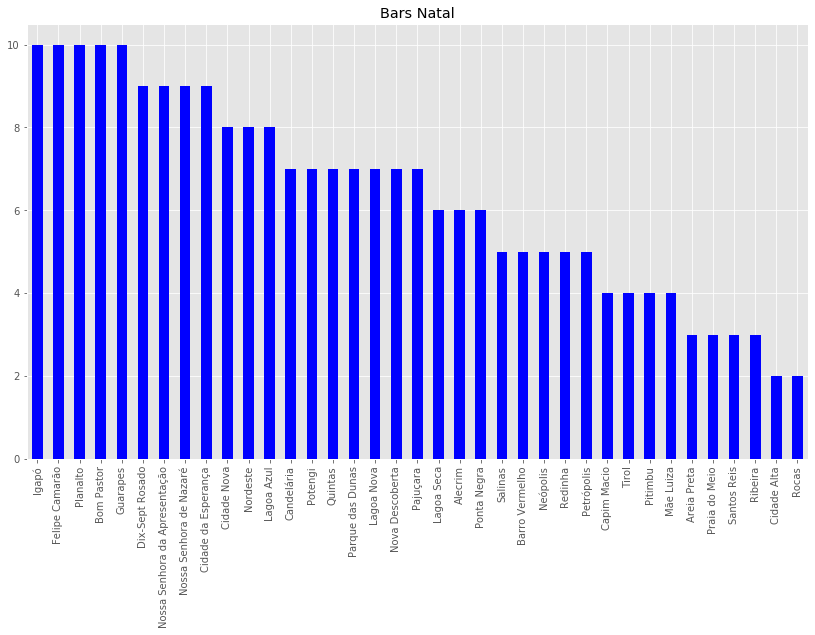

In [51]:
nearby_venues_bar['Neighborhood'].value_counts().plot(kind='bar',
                                         figsize=(14,8),
                                         title="Bars Natal",
                                         color="blue")

#CountStatus = pd.value_counts(nearby_venues_bar['Neighborhood'].values, sort=True)

#CountStatus.plot.barh()

We can see that we have 5 neighborhoods that contain the same amounts of bar are they; "Igapo", "Felipe Camarao", "Planalto", "Bom Pator" and "Guarapes", all of them count 10 bars according to Foursqaure's API, and the ones that have less bars, which is where our focus is? They are Cidade Alta and Rocas.

However, we saw that where there is a bar with a lot of gym, then we will see in the figure below which neighborhoods have more gym.

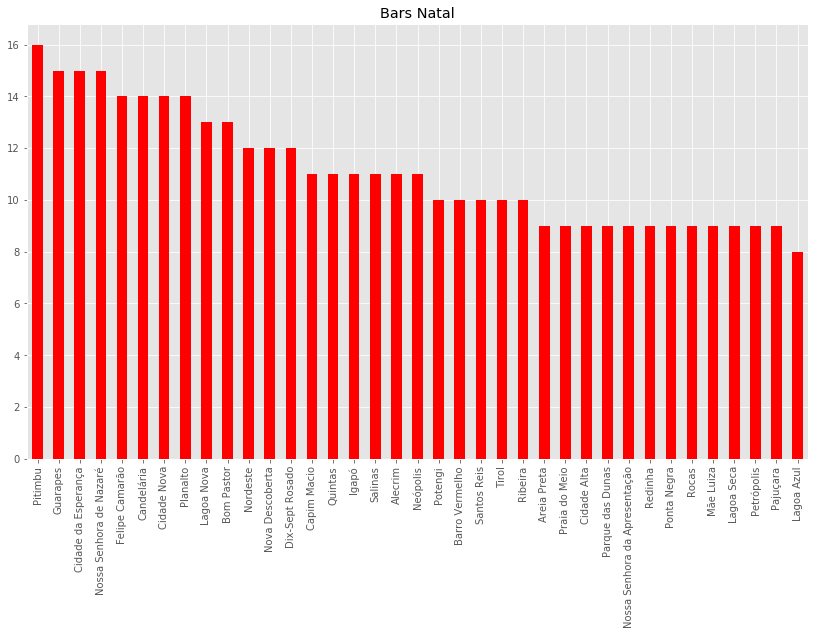

In [52]:
nearby_venues_gim_count['Neighborhood'].value_counts().plot(kind='bar',
                                         figsize=(14,8),
                                         title="Bars Natal",
                                         color="Red")

"Pitimbu" It was the neighborhood with the most gymnastics academy, in the next section we will discuss the result of our exploratory analysis.

## Discussion 

Well, we already worked on all the data, we did an analysis of their results. Now, let's go to a brief discussion of them.
We saw the neighborhoods that have more and less bars to be able to indicate the neighborhood that has the best business prospects to open a new neighborhood in the city of "Natal", but we are not only concerned with who has more or less bars, we went to see which the business that has more to do with the bars in the city and as it has been said that where there are bars there is a gym. However, it is not enough just to see who has less gym to open a new bar, but we have to ask who has less gym and more bars? For that we will analyze the data a little more.

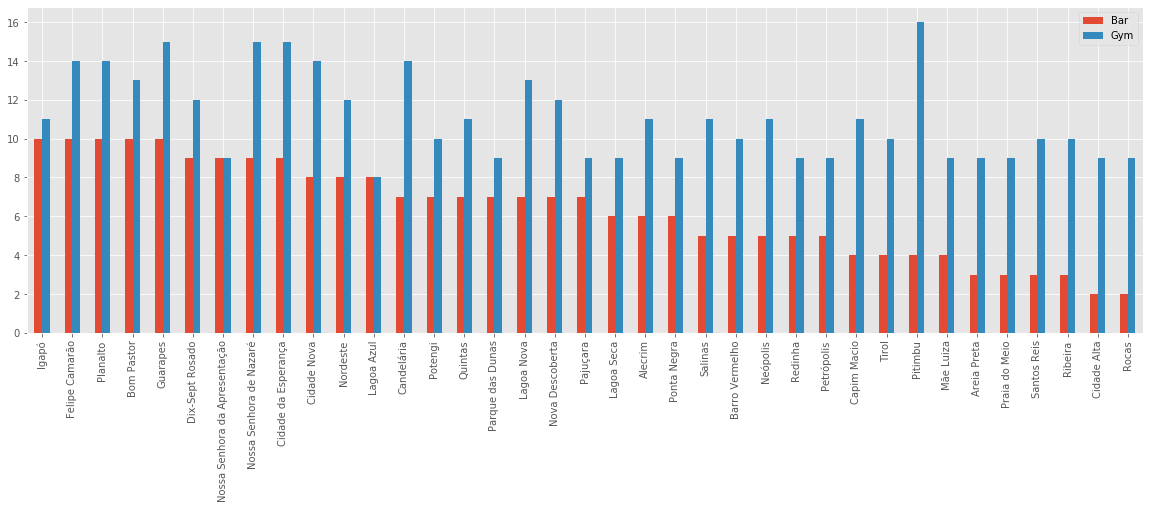

In [60]:
import random
import numpy
from matplotlib import pyplot

x = [nearby_venues_bar['Neighborhood'].value_counts()]
y = [nearby_venues_gim_count['Neighborhood'].value_counts()]

graph_df = nearby_venues_bar['Neighborhood'].value_counts().rename('Bar').to_frame()\
               .join(nearby_venues_gim_count['Neighborhood'].value_counts().rename('Gym').to_frame())

graph_df.plot(kind='bar',figsize=(20, 6))

Analyzing the chart above, we can see that the best neighborhoods with regard to bar and gym in our business perspective, that is, where there is more gym and less bar are the "Cidade alta" and "Rocas" neighborhoods that contain 4.5 gyms per bar, the "Pitimbu" neighborhood is also highlighted, the neighborhood that has the most gyms, but the gym ratio per bar is a little worse with an exact number of 4 gyms per bar. This graph is a good demonstration of what we have said so far, that where there is a bar there is a gym nearby, we can see that there are neighborhoods that contain a 1 to 1 relationship between bars and gyms, as in the neighborhoods of "Lagoa Azul"and "Nossa Senhora da Apresentação". In view of this exhaustive discussion, we can proceed to our conclusion.

## Conclusion  

After this extensive work with exploratory analysis we can come to some conclusions. First of all, we cannot always conclude that where there is less establishment is not the best corner for you to open your business, as we can see, it is not because the neighborhood that contained the least open bars was the best place to open a new one. Second conclusion is that we should not be in the guess, we have to analyze the data. We could never imagine that opening a bar near a gym would be a good deal, our work confirmed this information with data. Last and not least is the result. The neighborhoods with the best possibilities for opening new bars are "Pitimbu", "Lagoa Azul" and "Nossa Senhora da Presentation". The work could still yield other dicurations such as evaluations of these places, such as checking where there is less bar with the worst evaluations, the extension of each neighborhood to know a bar per square kilometer among other speeches, but we did not have resources and the work would be too extensive. . The data here has already been very enlightening and satisfactory so that we can have a direction for our goal, bringing back the initial question of our work, “Where can I open a new bar in Natal-RN? And we believe that we managed to answer them.